In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df_all = pd.read_csv(r"C:\Users\Wingb\Downloads\250902.csv")
data_list = df_all.Filename.unique().tolist()
df_all.head()

,MultiPointIndex,Entity,ObjectId,FITC_Sum,CenterX,CenterY,CenterPxX,CenterPxY,Activity_Spot_Number,Filename
0,1,FITC_Spots_4,1,273800.0,687.375,3.575,2115,11,1009,Green_Beads_250912_000_250903_30ms_15%.nd2
1,1,FITC_Spots_4,2,303750.0,15.600,3.900,48,12,1009,Green_Beads_250912_000_250903_30ms_15%.nd2
2,1,FITC_Spots_4,3,288469.0,349.050,3.900,1074,12,1009,Green_Beads_250912_000_250903_30ms_15%.nd2
3,1,FITC_Spots_4,4,308718.0,510.575,3.900,1571,12,1009,Green_Beads_250912_000_250903_30ms_15%.nd2
4,1,FITC_Spots_4,5,282431.0,298.025,5.200,917,16,1009,Green_Beads_250912_000_250903_30ms_15%.nd2


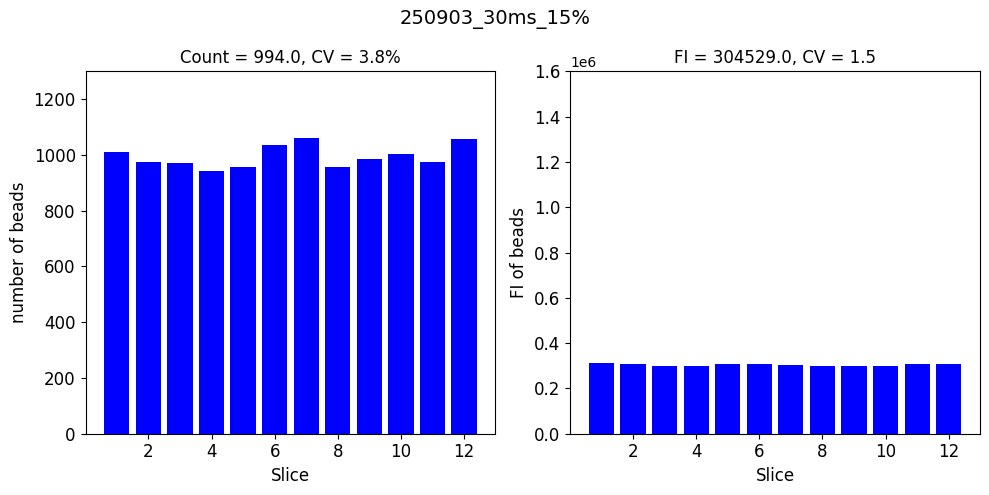

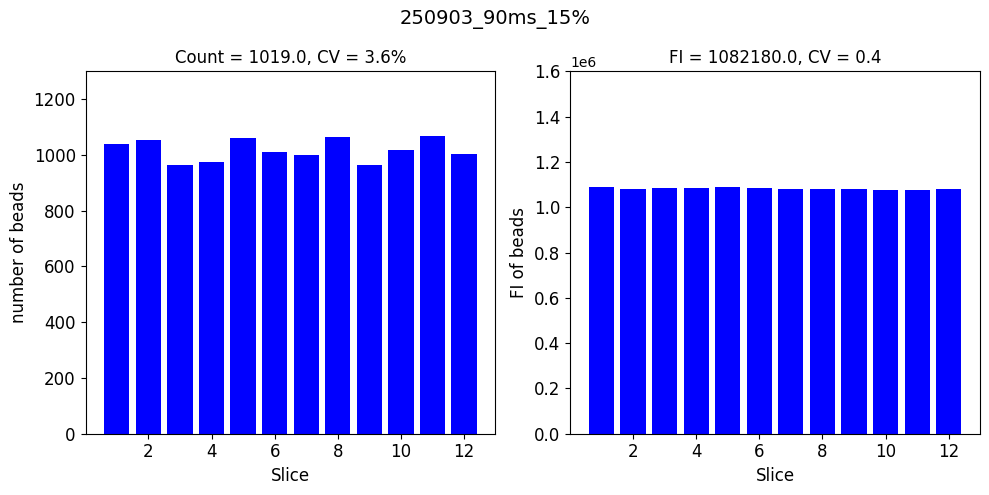

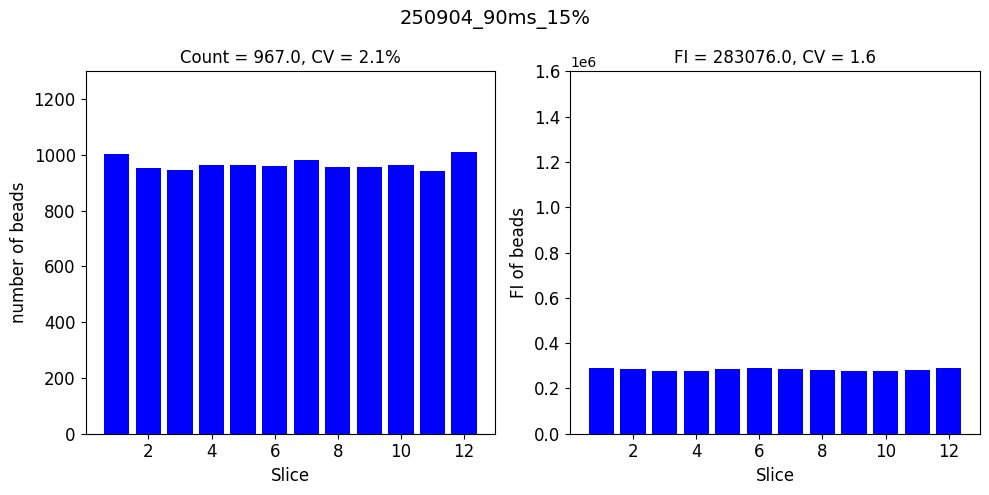

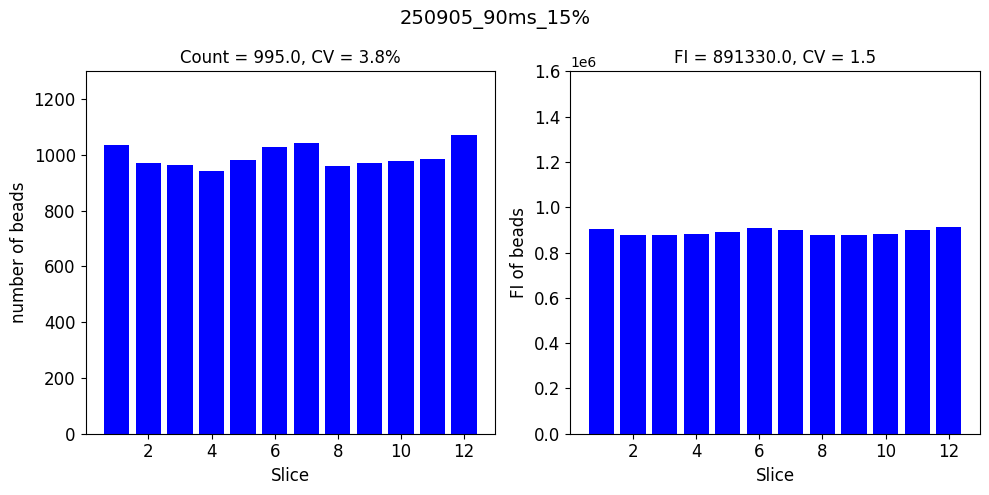

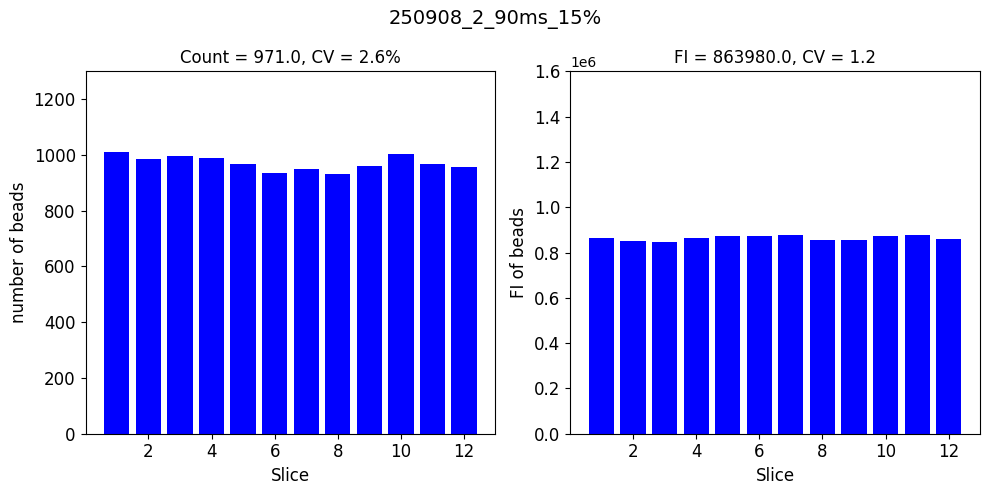

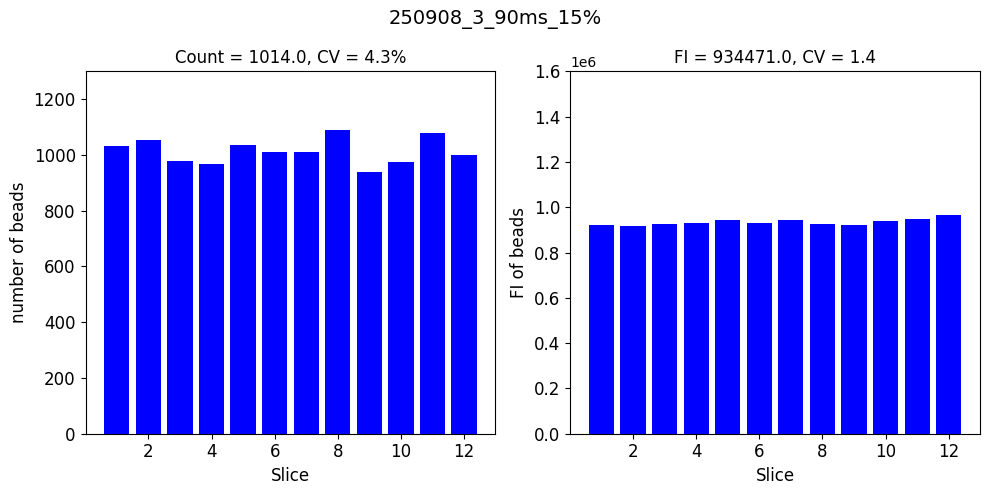

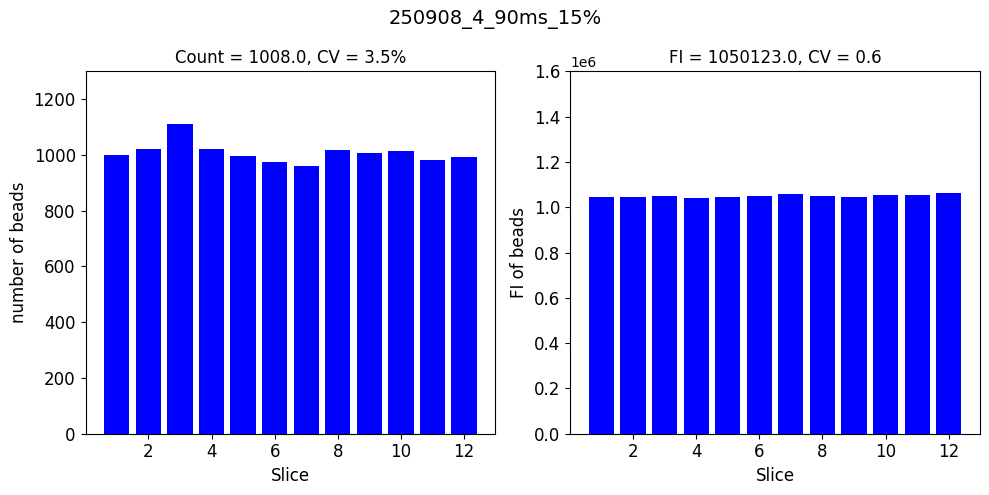

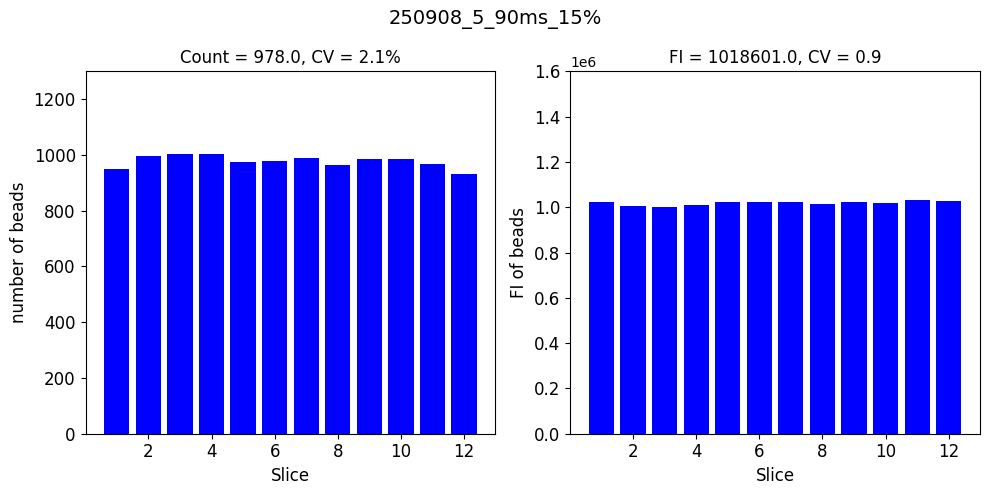

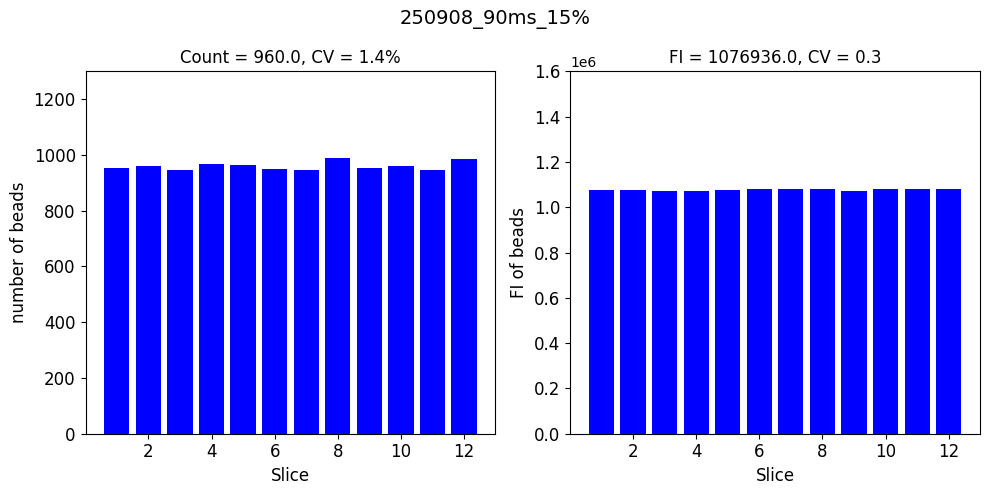

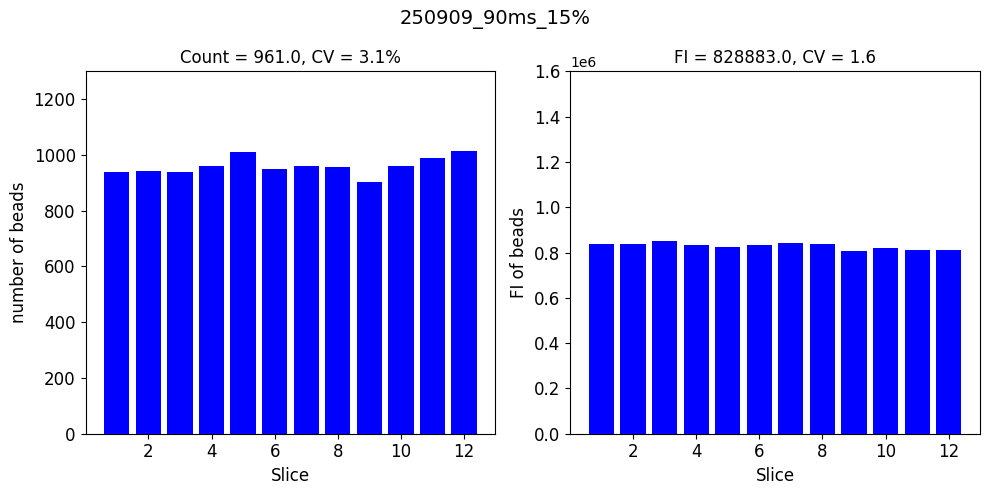

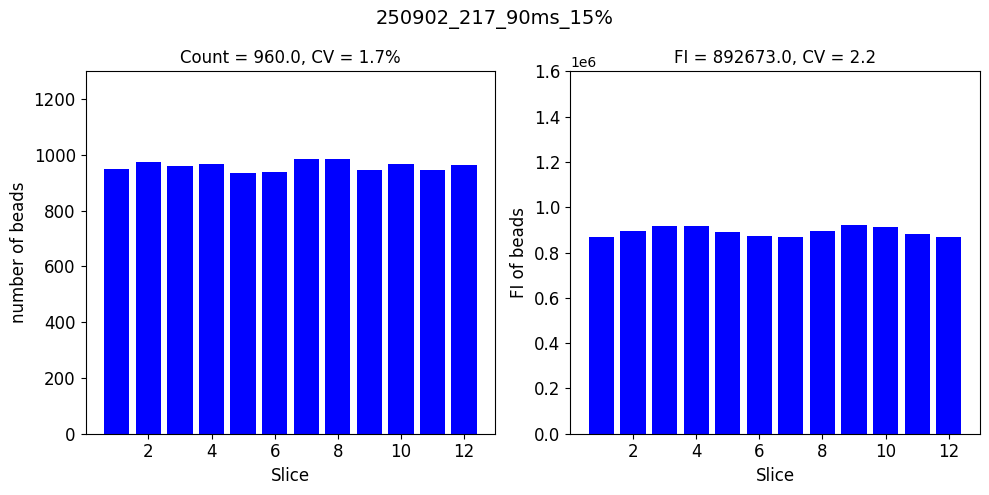

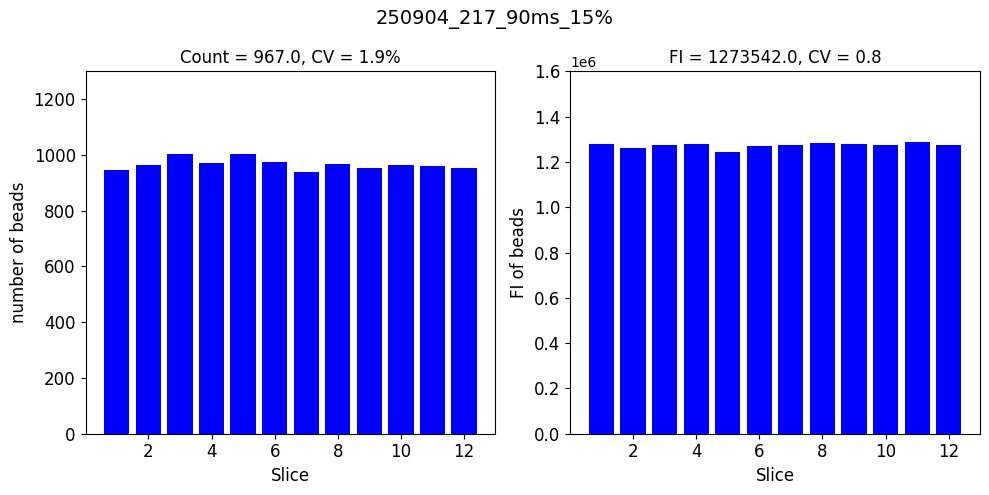

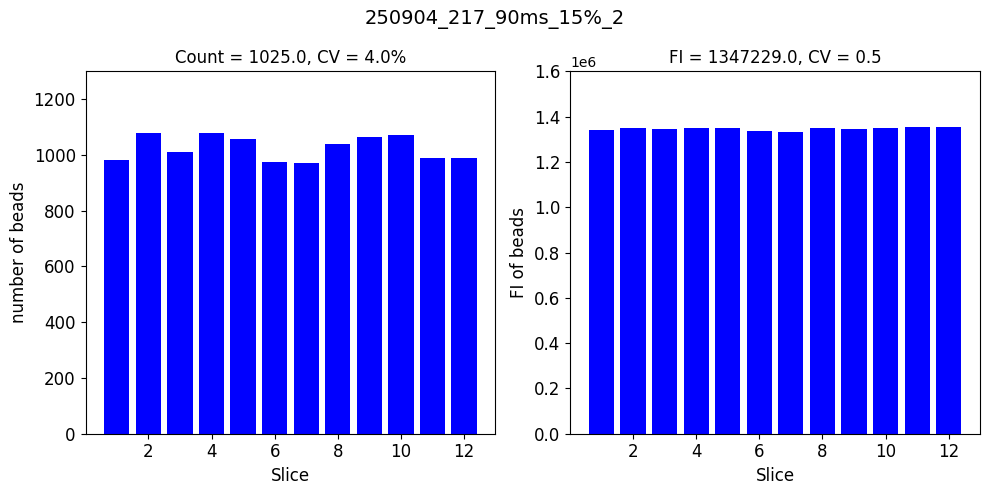

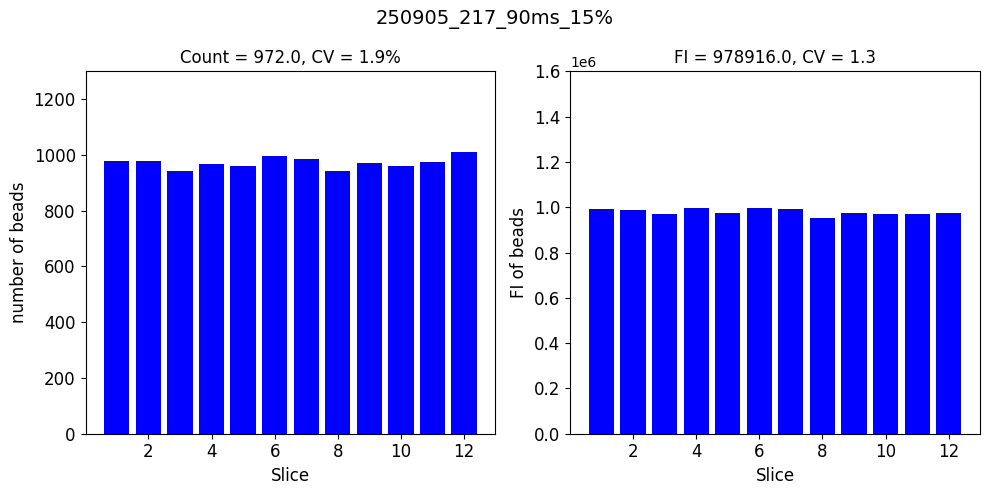

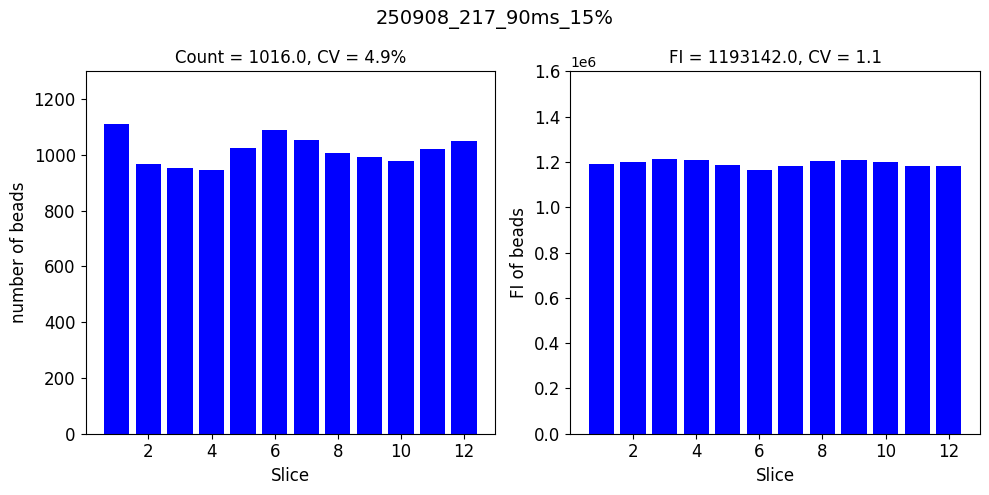

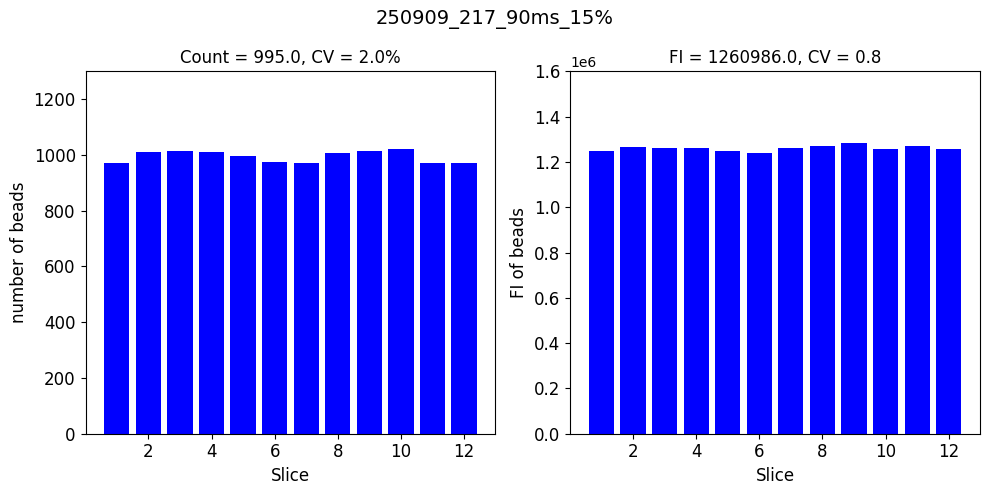

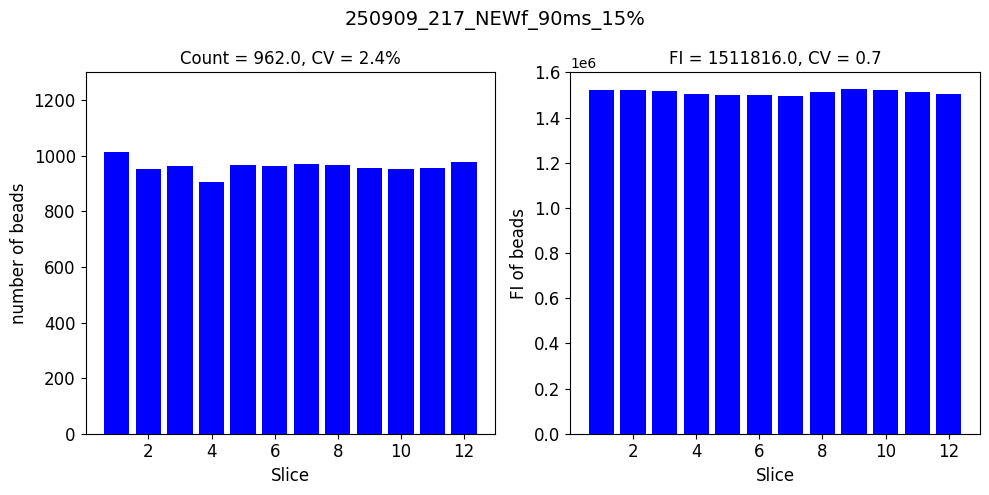

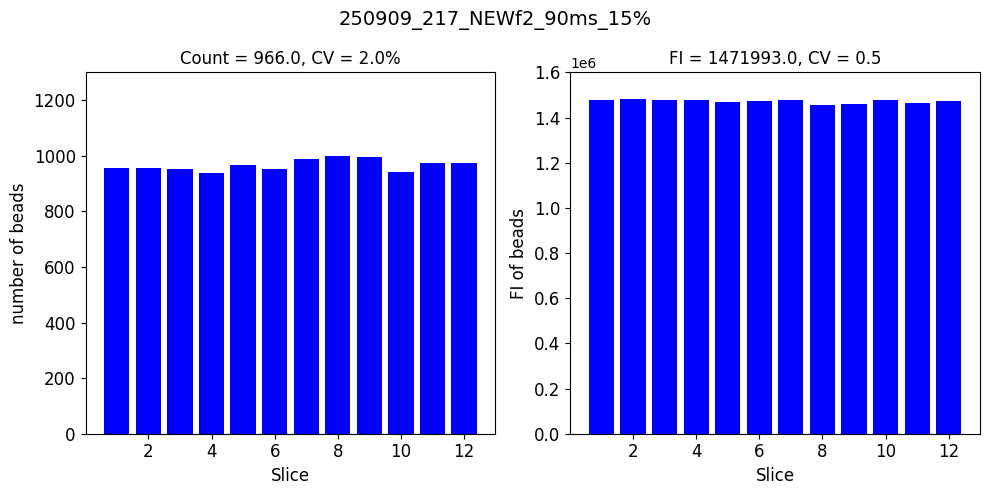

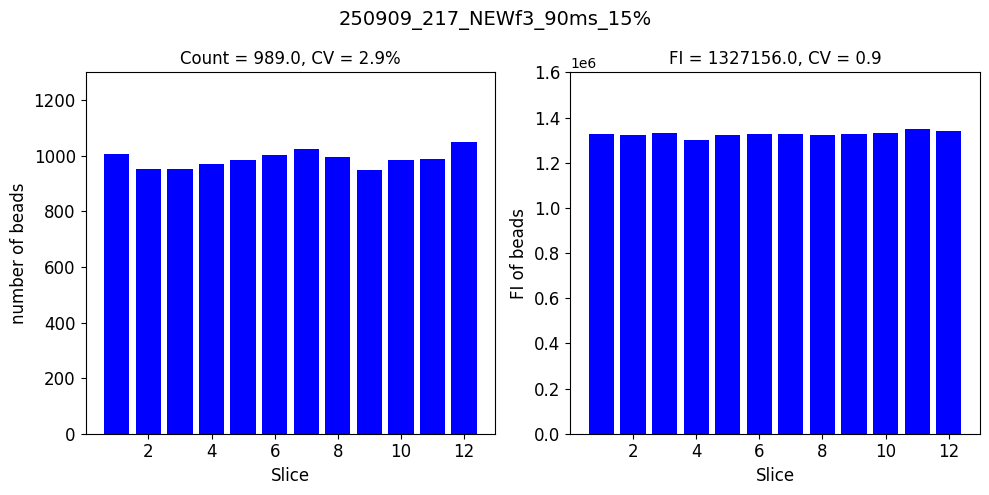

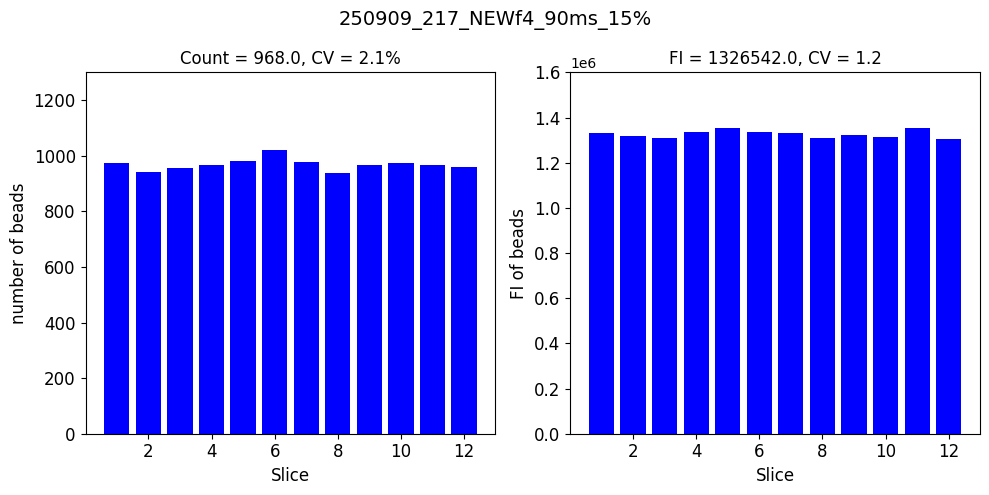

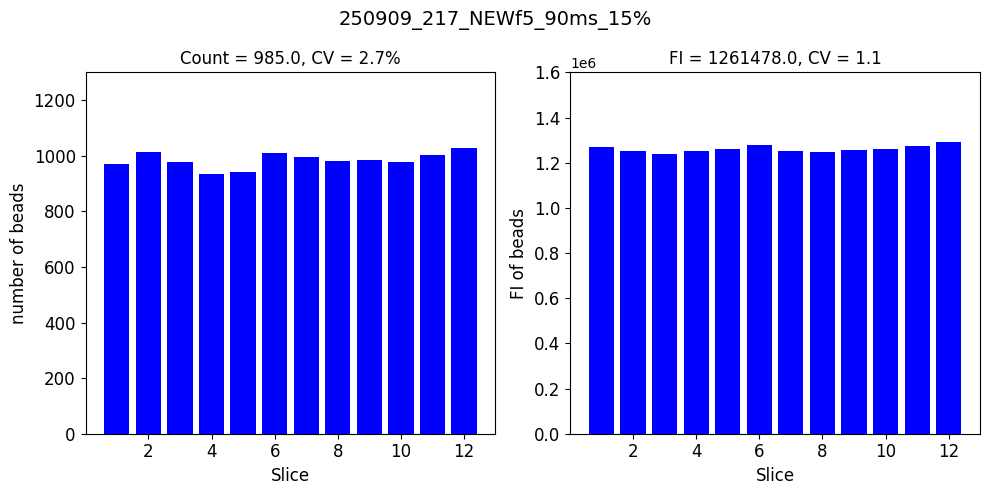

In [ ]:
df_new_result = pd.DataFrame()  # 念のため明示的に初期化
for i in data_list:
    df = df_all[df_all.Filename == i]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    x = np.arange(1, 13)
    y_count = np.empty(0)
    for k in range(1, 13):
        df_f = df[df.MultiPointIndex == k]
        count_f = df_f.Activity_Spot_Number.unique()[0]
        y_count = np.append(y_count, count_f)
    count = round(np.average(y_count), 0)
    cv_count_f = np.std(y_count) / np.average(y_count) if np.average(y_count) > 0 else 0
    cv_count_f = round(cv_count_f * 100, 1)

    plt.bar(x, y_count, color="blue")
    plt.xlabel("Slice", fontsize=12)
    plt.ylabel("number of beads", fontsize=12)
    plt.ylim([0, 1300])
    plt.tick_params(labelsize=12)
    plt.title(f"Count = {count}, CV = {cv_count_f}%", fontsize=12)

    plt.subplot(1, 2, 2)
    y_intensity = np.empty(0)
    for k in range(1, 13):
        df_f = df[df.MultiPointIndex == k]
        intensity_f = np.average(df_f.FITC_Sum)
        y_intensity = np.append(y_intensity, intensity_f)
    intensity = round(np.average(df.FITC_Sum), 0)
    cv_intensity_f = (
        np.std(y_intensity) / np.average(y_intensity)
        if np.average(y_intensity) > 0
        else 0
    )
    cv_intensity_f = round(cv_intensity_f * 100, 1)
    cv_intensity_all = (
        np.std(df.FITC_Sum) / np.average(df.FITC_Sum)
        if np.average(df.FITC_Sum) > 0
        else 0
    )
    cv_intensity_all = round(cv_intensity_all * 100, 1)

    plt.bar(x, y_intensity, color="blue")
    plt.xlabel("Slice", fontsize=12)
    plt.ylabel("FI of beads", fontsize=12)
    plt.ylim([0, 1600000])
    plt.tick_params(labelsize=12)
    plt.title(f"FI = {intensity}, CV = {cv_intensity_f}", fontsize=12)

    prefix = "Green_Beads_250912_000_"
    suffix = ".nd2"
    filename = i[len(prefix) : -len(suffix)]
    plt.suptitle(i[len(prefix) : -len(suffix)], fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    plt.show()

    data_dictionary = {
        "Filename": filename,
        "Count": count,
        "Count_CV_field": cv_count_f,
        "Intensity": intensity,
        "Intensity_CV_all": cv_intensity_all,
        "Intensity_CV_field": cv_intensity_f,
    }

    df_indivisual = pd.DataFrame(data_dictionary, index=[0])
    df_new_result = pd.concat([df_new_result, df_indivisual])

df_new_result.to_csv(r"C:\Users\Wingb\Downloads\beads_result.csv", index=False)